#### Setup
1. go to https://github.com/CSSEGISandData/COVID-19
2. git clone John Hopkins data repository into your Documents folder (only works for Windows, make necessary adjustments if you're on Mac)

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import getpass
import subprocess
from datetime import datetime
user = getpass.getuser()
os.chdir("C:/Users/"+user+"/Documents/git/COVID-19")

top_no_countries = 10

In [2]:
# data pulling and date setting
output = subprocess.check_output(["git", "pull"])
cases_data  = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
last_day = cases_data.columns[-1]
week_ago = cases_data.columns[-8]
days_available = cases_data.columns[4:].tolist()
print(last_day)

4/15/20


In [3]:
# adding continent information to the data
missing_countries = {
    "Congo (Brazzaville)": "AF",
    "Congo (Kinshasa)": "AF",
    "Cote d'Ivoire": "AF",
    "Diamond Princess": "AS",
    "Holy See": "AS",
    "Korea, South": "AS",
    "Taiwan*": "AS",
    "Timor-Leste": "AS",
    "West Bank and Gaza": "AS",
    "Kosovo": "EU",
    "Burma": "AS",
    "MS Zaandam": "NA",
    "US": "NA",
    "Western Sahara": "AF"}

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czechia', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia',
                'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland']

continent_names = {
    'EU': 'Europe',
    'NA': 'North America',
    'AS': 'Asia',
    'SA': 'South America',
    'AF': 'Africa',
    'OC': 'Australia and Oceania'
}

def country_to_continent(country):
    if country in missing_countries:
        return continent_names[missing_countries[country]]
    elif country in eu_countries:
        return 'EU27'
    else:
        try:
            return continent_names[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        except:
            print(country)
            return "XX"

cases_data['continent']  = cases_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)
deaths_data['continent'] = deaths_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)

In [4]:
# continents - cases
continent_cases = cases_data[['continent', week_ago, last_day]]
continent_cases = continent_cases.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_cases['perc_increase'] = continent_cases.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_increase']], index = continent_cases.index)
continent_cases['perc_of_global'] = continent_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
continent_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_of_global']], index = continent_cases.index)
continent_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [5]:
# continents - deaths
continent_deaths = deaths_data[['continent', week_ago, last_day]]
continent_deaths = continent_deaths.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_deaths['perc_increase'] = continent_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_increase']], index = continent_deaths.index)
continent_deaths['perc_of_global'] = continent_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
continent_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_of_global']], index = continent_deaths.index)
continent_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

In [6]:
# countries - cases
countries_cases = cases_data[['Country/Region', week_ago, last_day]]
countries_cases = countries_cases.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_cases['perc_increase'] = countries_cases.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_increase']], index = countries_cases.index)
countries_cases['perc_of_global'] = countries_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
countries_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_of_global']], index = countries_cases.index)
countries_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [7]:
top_countries = list(countries_cases.head(top_no_countries).index)

In [8]:
# countries - deaths
countries_deaths = deaths_data[['Country/Region', week_ago, last_day]]
countries_deaths = countries_deaths.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_deaths['perc_increase'] = countries_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_increase']], index = countries_deaths.index)
countries_deaths['perc_of_global'] = countries_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
countries_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_of_global']], index = countries_deaths.index)
countries_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

No handles with labels found to put in legend.


                       4/8/20  4/15/20 perc_increase perc_of_global
continent                                                          
EU27                   635941   778065        22.35%         37.84%
North America          457191   679875        48.71%         33.07%
Asia                   253094   332626        31.42%         16.18%
Europe                 110957   177660        60.12%          8.64%
South America           35244    62786        78.15%          3.05%
Africa                  11440    17198        50.33%          0.84%
Australia and Oceania    7237     7844         8.39%          0.38%


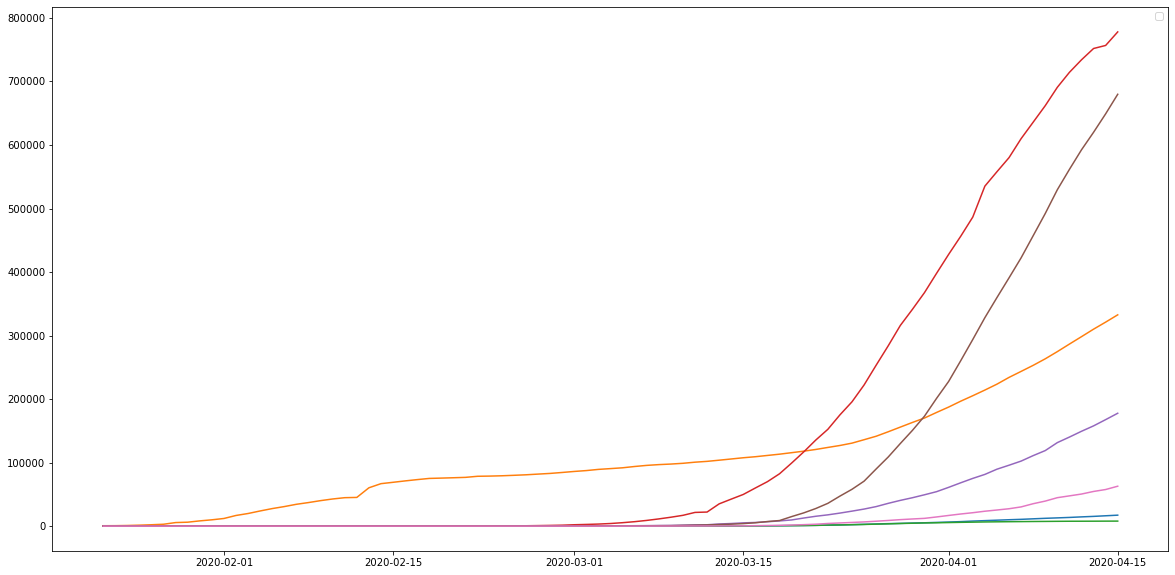

In [9]:
# continent cases - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_cases_graph = cases_data[['continent',] + days_available]
continent_cases_graph = pd.melt(continent_cases_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_cases_graph['day'] = continent_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_cases_graph.reset_index(inplace=True)
continent_cases_graph = pd.pivot_table(continent_cases_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_cases_graph.columns.levels[1]):
    plt.plot(continent_cases_graph.index, continent_cases_graph['cases'][continent])
plt.legend()
print(continent_cases)

No handles with labels found to put in legend.


                       4/8/20  4/15/20 perc_increase perc_of_global
continent                                                          
EU27                    52826    73300        38.76%         54.63%
North America           15484    30128        94.58%         22.45%
Europe                   8484    14974        76.50%         11.16%
Asia                     9529    12019        26.13%          8.96%
South America            1390     2774        99.57%          2.07%
Africa                    574      910        58.54%          0.68%
Australia and Oceania      51       72        41.18%          0.05%


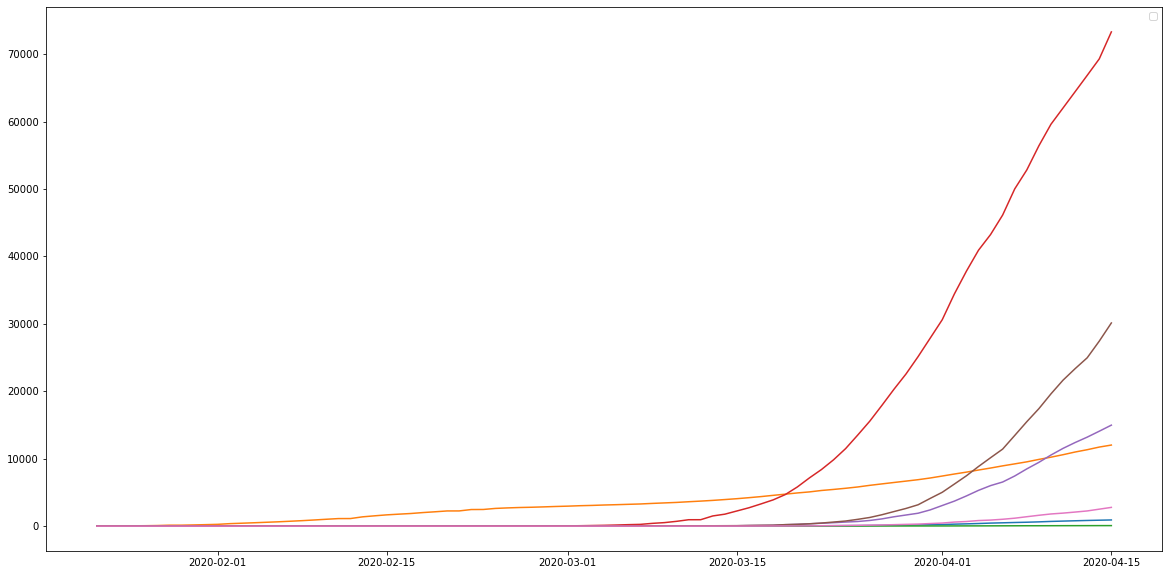

In [10]:
# continent deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_deaths_graph = deaths_data[['continent',] + days_available]
continent_deaths_graph = pd.melt(continent_deaths_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_deaths_graph['day'] = continent_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_deaths_graph.reset_index(inplace=True)
continent_deaths_graph = pd.pivot_table(continent_deaths_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_deaths_graph.columns.levels[1]):
    plt.plot(continent_deaths_graph.index, continent_deaths_graph['cases'][continent])
plt.legend()
print(continent_deaths)

No handles with labels found to put in legend.


                4/8/20  4/15/20 perc_increase perc_of_global
Country/Region                                              
US              429052   636350        48.32%         30.95%
Spain           148220   177644        19.85%          8.64%
Italy           139422   165155        18.46%          8.03%
Germany         113296   134753        18.94%          6.55%
France          113959   134582        18.10%          6.55%
United Kingdom   61474    99483        61.83%          4.84%
China            82809    83356         0.66%          4.05%
Iran             64586    76389        18.27%          3.72%
Turkey           38226    69392        81.53%          3.38%
Belgium          23403    33573        43.46%          1.63%


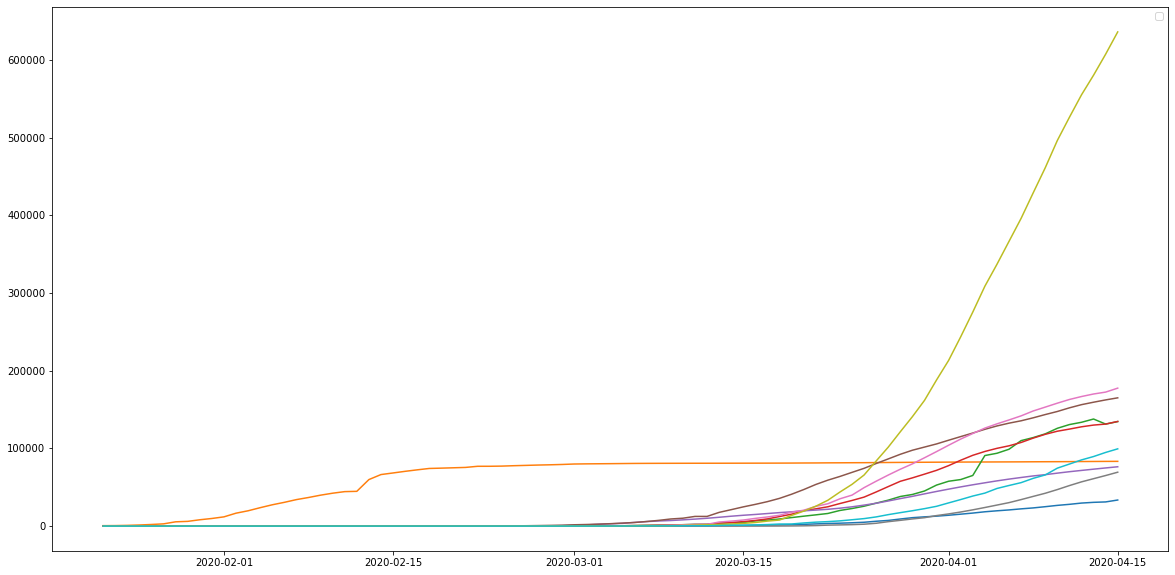

In [11]:
# country cases - graph
plt.rcParams["figure.figsize"] = (20,10)
country_cases_graph = cases_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_cases_graph = pd.melt(country_cases_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_cases_graph['day'] = country_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_cases_graph.reset_index(inplace=True)
country_cases_graph = pd.pivot_table(country_cases_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_cases_graph.columns.levels[1]):
    plt.plot(country_cases_graph.index, country_cases_graph['cases'][country])
plt.legend()
print(countries_cases.head(top_no_countries))

No handles with labels found to put in legend.


                4/8/20  4/15/20 perc_increase perc_of_global
Country/Region                                              
US               14695    28326        92.76%         21.11%
Italy            17669    21645        22.50%         16.13%
Spain            14792    18708        26.47%         13.94%
France           10887    17188        57.88%         12.81%
United Kingdom    7111    12894        81.32%          9.61%
Iran              3993     4777        19.63%          3.56%
Belgium           2240     4440        98.21%          3.31%
Germany           2349     3804        61.94%          2.84%
China             3337     3346         0.27%          2.49%
Netherlands       2255     3145        39.47%          2.34%


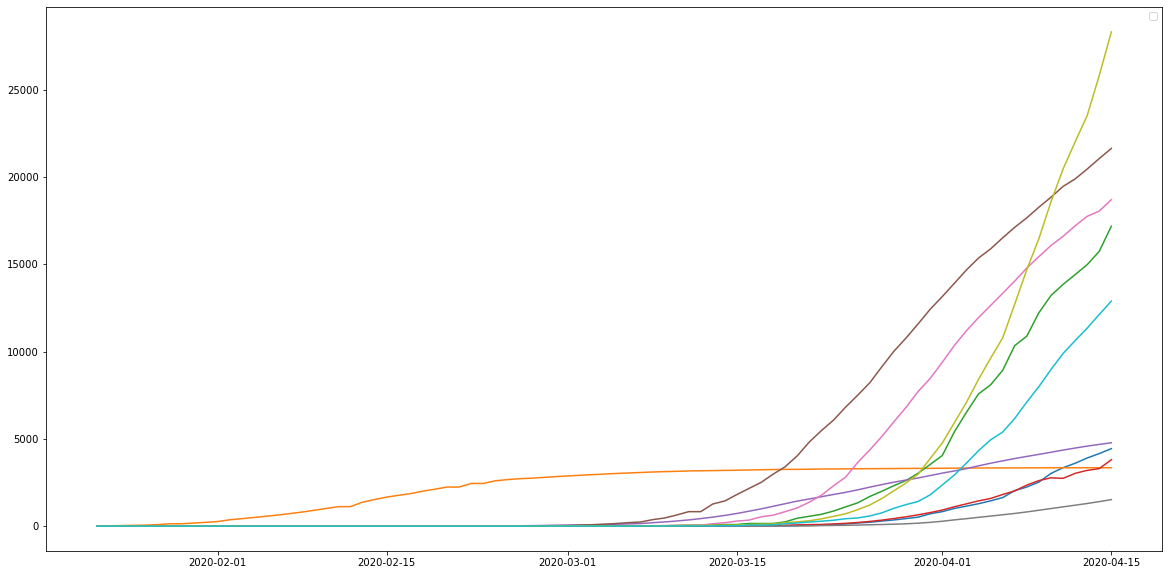

In [12]:
# country deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
country_deaths_graph = deaths_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_deaths_graph = pd.melt(country_deaths_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_deaths_graph['day'] = country_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_deaths_graph.reset_index(inplace=True)
country_deaths_graph = pd.pivot_table(country_deaths_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_deaths_graph.columns.levels[1]):
    plt.plot(country_deaths_graph.index, country_deaths_graph['cases'][country])
plt.legend()
print(countries_deaths.head(top_no_countries))

In [ ]:
os.chdir("C:/Users/"+user+"/Documents/git/covid19_daily_charts")
subprocess.check_output(["git", "add", "covid19_daily_charts.ipynb"])
subprocess.check_output(["git", "commit", "-m", "'updating the data'"])
subprocess.check_output(["git", "push"])